# Task1

In [179]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_excel('Sample_Superstore.xls', sheet_name='Orders')

# Remove duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Remove duplicate rows
data = data.drop_duplicates()

# Remove blank columns
data = data.dropna(axis=1, how='all')

# Remove blank rows
data = data.dropna(axis=0, how='all')

# Display the cleaned data
data


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category.2,Product Name.1,Sales.2,Quantity.2,Discount.1,Profit.1,Country.2,Region.2,Sub-Category.3,Quantity.3
0,1.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,United States,South,Bookcases,2.000
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,United States,South,Chairs,3.000
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,United States,West,Labels,2.000
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,United States,South,Tables,5.000
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,United States,South,Storage,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,9980.0,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Binders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437.472
11416,9981.0,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,Tables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.980
11417,9982.0,CA-2017-163566,2017-08-03,2017-08-06,First Class,TB-21055,Ted Butterfield,Consumer,United States,Fairfield,...,Labels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.520
11418,9983.0,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,Paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.560


<BarContainer object of 4 artists>

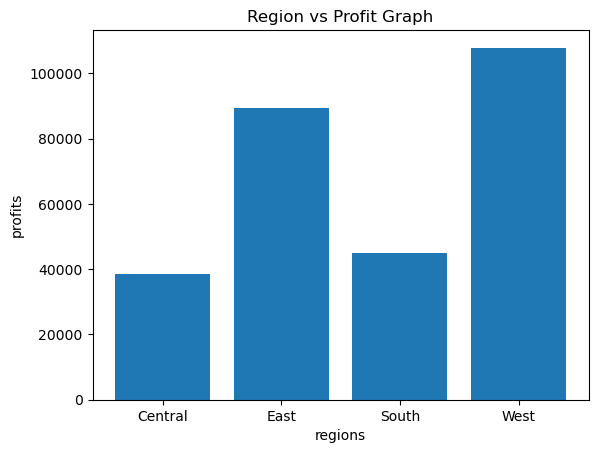

In [122]:
#1.How does the distribution of profit vary across different regions?

data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce').fillna(0)
RegionProfits = data.groupby("Region")["Profit"].sum()
region = RegionProfits.index
profits = RegionProfits.values

plt.title('Region vs Profit Graph')
plt.xlabel('regions')
plt.ylabel('profits')
plt.bar(region,profits)

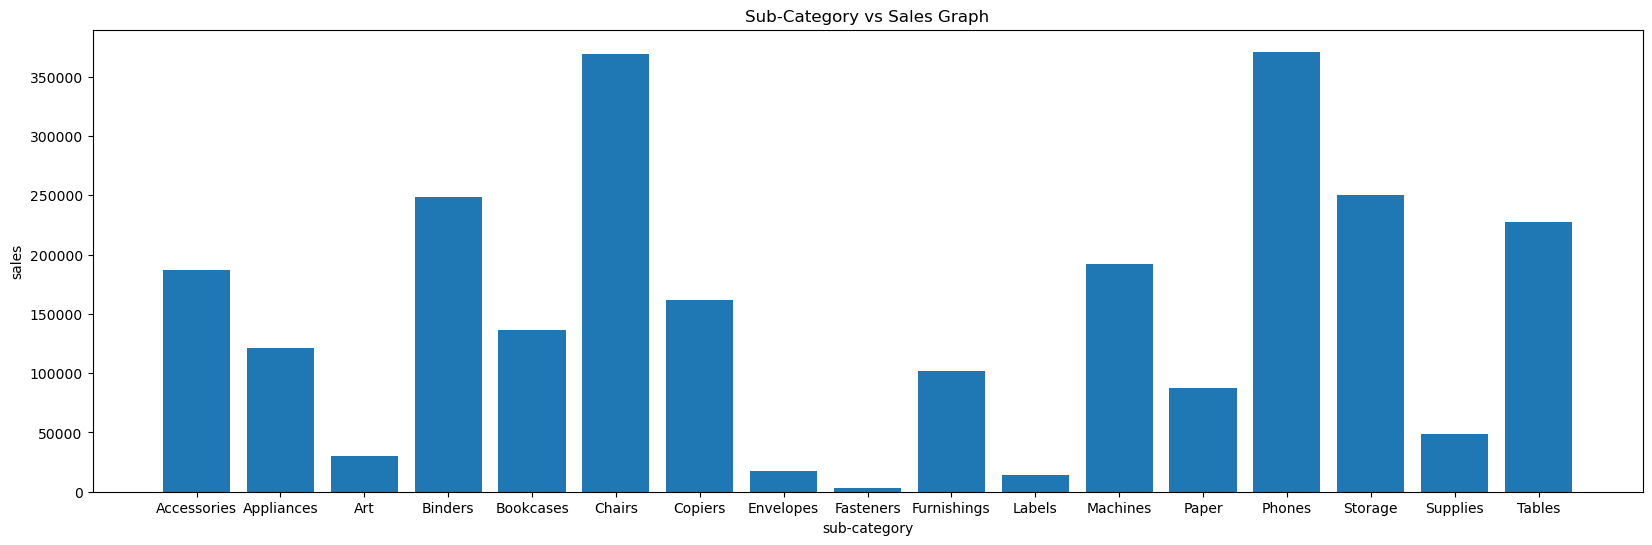

In [180]:
#2.Can you create a bar chart to compare the sales performance of different sub-categories of
#products?

data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce').fillna(0)
subCategorySales = data.groupby("Sub-Category")["Sales"].sum()
subCategoryName = subCategorySales.index
subCategorySales = subCategorySales.values

plt.figure(figsize=(20, 6))
plt.title('Sub-Category vs Sales Graph')
plt.xlabel('sub-category')
plt.ylabel('sales')
plt.bar(subCategoryName,subCategorySales)
plt.show()


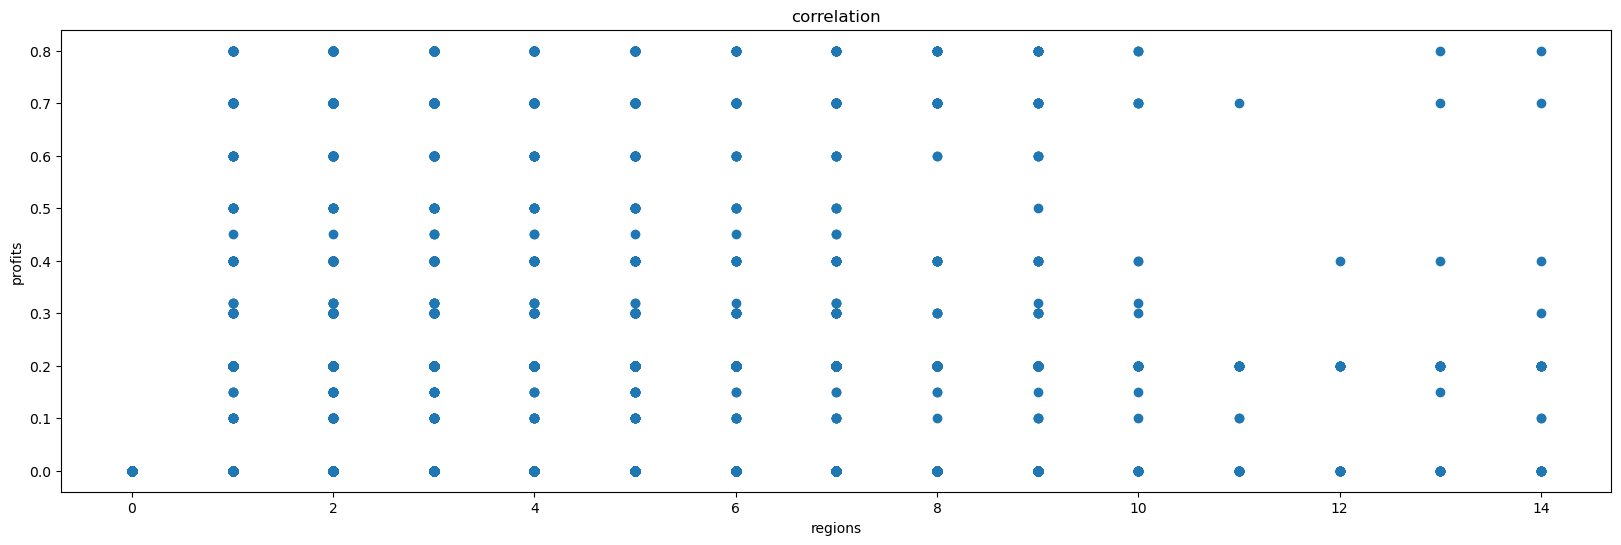

In [181]:
#3.Is there a correlation between the quantity of products ordered and the discount given? Visualize
#it using a scatter plot.

data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce').fillna(0)
data['Discount'] = pd.to_numeric(data['Discount'], errors='coerce').fillna(0)


plt.figure(figsize=(20, 6))
plt.title('correlation')
plt.xlabel('regions')
plt.ylabel('profits')
plt.scatter(data['Quantity'],data['Discount'])
plt.show()



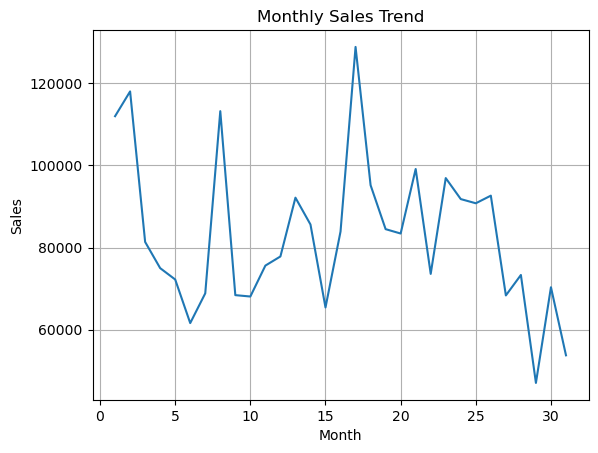

In [182]:
#4.Create a line chart to show the trend of sales over time.
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce').fillna(0)
data['Order Date']=pd.to_datetime(data['Order Date'])

monthly_sales = data.groupby(data['Order Date'].dt.day)['Sales'].sum()
# Create a line plot
plt.grid()
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()

([<matplotlib.patches.Wedge at 0x10f6a6ba680>,
 [Text(-1.051295944644557, -0.32369250342556444, 'Standard Class'),
  Text(1.0287858027207915, -0.3893581540434682, 'Second Class'),
  Text(0.814423754233389, 0.7394010742083031, 'First Class'),
  Text(0.18951685021779036, 1.0835512740445317, 'Same Day')],
 [Text(-0.5734341516243037, -0.1765595473230351, '59.5%'),
  Text(0.5611558923931589, -0.2123771749328008, '19.5%'),
  Text(0.4442311386727576, 0.4033096768408926, '15.5%'),
  Text(0.103372827391522, 0.5910279676606536, '5.5%')])

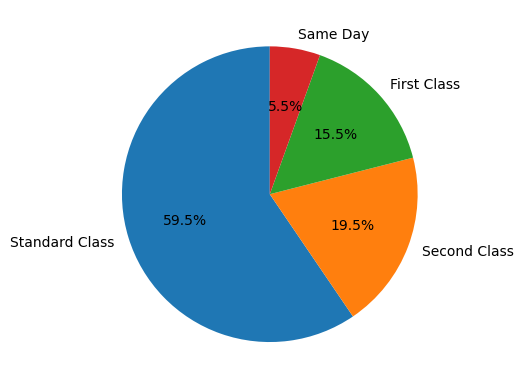

In [126]:
#5.Can you visualize the distribution of shipping modes using a pie chart?


shippingMode = data['Ship Mode'].value_counts()
# Create a line plot
shipIndex = shippingMode.index
shipValue=  shippingMode.values

plt.pie(shipValue, labels=shipIndex, autopct='%1.1f%%', startangle=90)

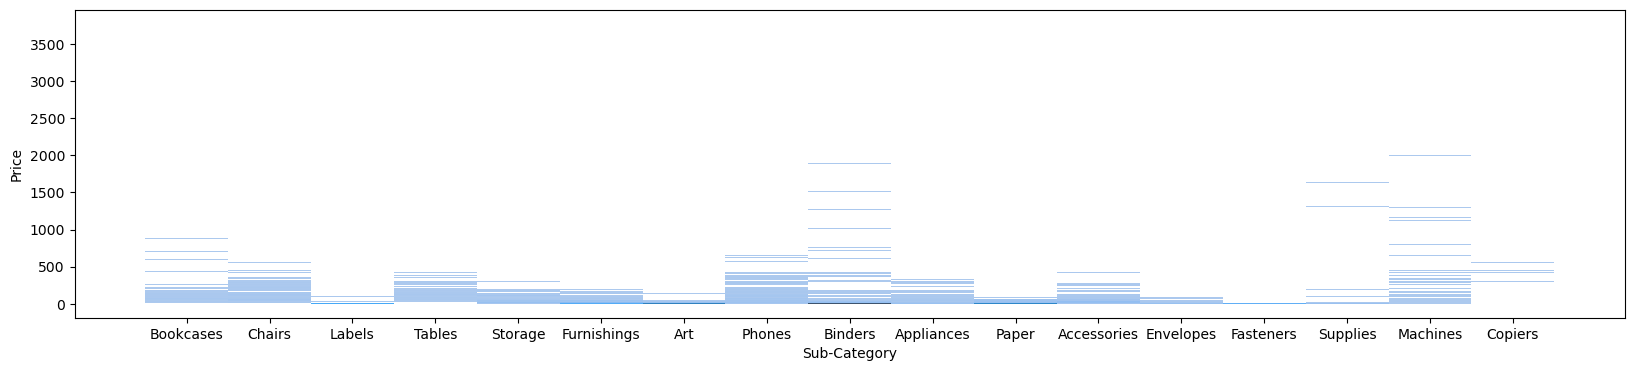

In [183]:
#6.Plot a histogram to analyze the distribution of product prices.
import matplotlib.pyplot as plt

data['Price'] = data['Sales'] / data['Quantity']

category_price = data[['Sub-Category', 'Price']]
plt.figure(figsize=(20,4))
sb.histplot(data=category_price, x='Sub-Category', y='Price')

plt.show()



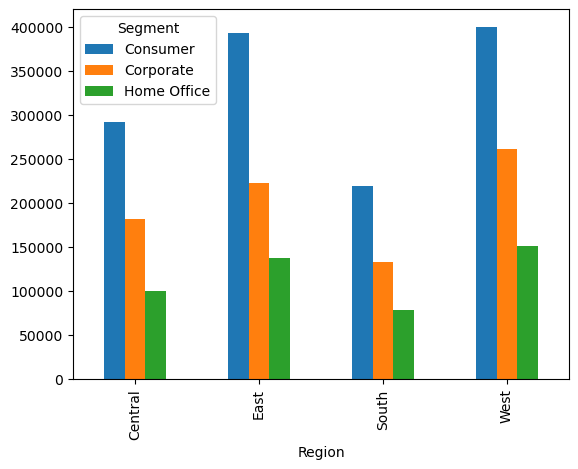

In [107]:
#7.Create a stacked bar chart to compare the sales performance of different segments in each region.
sales_segment_region = data.groupby(["Region","Segment" ])["Sales"].sum().unstack()
sales_segment_region.plot(kind= 'bar')

plt.show()

# Task 2

In [115]:
#1. What is the total number of rows in the dataset?
rows =len(data)
print('Rows',rows)

Rows 11249


In [118]:
#2. How many columns are there in the dataset?
coloums=len(data.columns)
print('Coloums',coloums)

Coloums 40


In [129]:
#3. What is the earliest order date in the dataset?

earlier=pd.to_datetime(data['Order Date']).min()
earlier

Timestamp('2014-01-03 00:00:00')

In [130]:
#4. What is the latest ship date in the dataset?
latest=pd.to_datetime(data['Order Date']).max()
latest

Timestamp('2017-12-30 00:00:00')

In [136]:
#5. Which ship mode is the most commonly used?
shippingMode = data['Ship Mode'].value_counts()
print(shippingMode)
print('the most used shipping mode is',shippingMode.index[0])

Standard Class    6694
Second Class      2190
First Class       1745
Same Day           620
Name: Ship Mode, dtype: int64
the most used shipping mode is Standard Class


In [140]:
#6. How many unique customers are there in the dataset?
unique = data['Customer ID'].unique()
print('the unique customers are',len(unique))

the unique customers are 793


In [157]:
#7. Which state has the highest number of orders?
state_order_counts = data.groupby("State")["Order ID"].count()
state_with_highest_orders = state_order_counts.idxmax()
print(state_with_highest_orders)

California


In [185]:
#8. What is the average quantity of products ordered?
state_order_mean = data["Quantity"].mean()
state_order_mean

3.321361898835452

In [161]:
#9. Which segment of customers generates the highest profit?
state_profit = data.groupby("Segment")["Profit"].sum()
state_profit

Segment
Consumer       131386.8421
Corporate       88922.3111
Home Office     60388.7888
Name: Profit, dtype: float64

In [165]:
#10. Which sub-category of products has the highest average discount?
state_profit_Average = data.groupby("Sub-Category")["Discount"].sum()
state_profit_Average

Sub-Category
Accessories     60.60
Appliances      77.30
Art             58.60
Binders        557.90
Bookcases       47.67
Chairs         104.10
Copiers         11.00
Envelopes       19.60
Fasteners       17.80
Furnishings    131.40
Labels          24.40
Machines        34.70
Paper          100.60
Phones         136.20
Storage         63.20
Supplies        14.60
Tables          81.65
Name: Discount, dtype: float64

<Axes: >

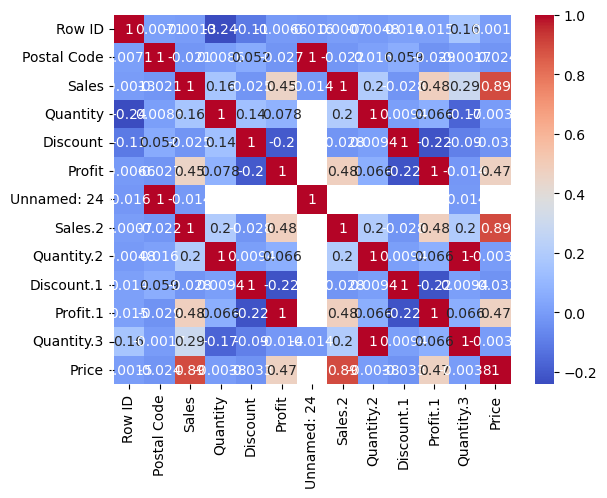

In [166]:
#11. wrtie a code to remove outliers and then make a prefect Heatmap.

import seaborn as sb

numeric_coloum = data.select_dtypes(include = 'number')
numeric_coloum
correlation= numeric_coloum.corr()
correlation
sb.heatmap(correlation, annot=True ,cmap='coolwarm')